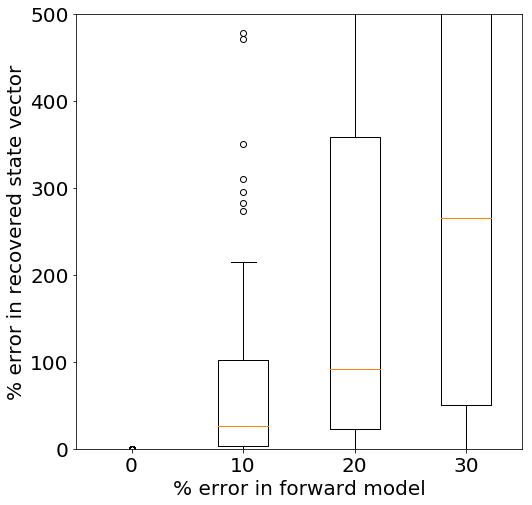

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 20})

# things to try here:
# --a biased change
# --plot the average

s = 10
n = 100

# error_gen = lambda: np.array([[np.random.rand() - 0.5, 0, 0],[0,0,0],[0,0,0]])
# error_gen = lambda: np.array([[1 + 0.1 * np.random.rand(), 0, 0],[0,0,0],[0,0,0]])

data_errs = []
inverse_model_errs = []

for data_err in np.linspace(0.0, 0.3, 4):
    error_gen = lambda: data_err * (np.random.rand(s,s) - 0.5)
    inverse_model_errs.append([])
    for j in range(n):
        G = np.random.rand(s,s)
        G_err = G + error_gen()
        m = np.random.rand(s)
        d = G.dot(m)
        d_err = G_err.dot(m)
        G_err_inv = np.linalg.inv(G_err)
        m_err = G_err_inv.dot(d)

        # data_errs.append(np.max(np.abs(d_err - d)))
        # inverse_model_errs.append(np.max(np.abs(m_err - m)))
        # data_errs[-1].append(np.mean(np.abs(d_err - d)))
        inverse_model_errs[-1].append(np.mean(np.abs(m_err / m)) * 100 - 100)

# DE = np.array(data_errs)
ME = np.array(inverse_model_errs)

plt.figure(figsize = (8,8))
plt.boxplot(ME.T)
plt.ylim(0,500)
plt.xlabel('% error in forward model');
plt.ylabel('% error in recovered state vector');
plt.gca().set_xticklabels(['0', '10', '20', '30'])
plt.savefig('inversion_error.pdf', bbox_inches = 'tight')
plt.show()

# plt.figure()
# plt.title('data errors')
# plt.hist(DE, bins = 50)
# plt.axvline(DE.mean(), color = 'r')
# plt.axvline(np.median(DE), color = 'b')
#
# plt.figure()
# plt.title('inverse model errors')
# h = plt.hist(ME, bins = 50, range = (0,10))
# plt.axvline(ME.mean(), color = 'r')
# plt.axvline(np.median(ME), color = 'b')
# plt.show()